<a href="https://colab.research.google.com/github/vijayseshachala2003/TensorGo/blob/main/Analyze_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4


In [1]:
!pip install -q -U bitsandbytes
!pip install -q -U git+https://github.com/huggingface/transformers.git
!pip install -q -U git+https://github.com/huggingface/peft.git
!pip install -q -U git+https://github.com/huggingface/accelerate.git
!pip install -q -U einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.5/137.5 MB 16.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:


from transformers import AutoModelForCausalLM
from transformers import AutoTokenizer
import transformers



In [3]:
model_name = "tiiuae/falcon-7b-instruct"
model = AutoModelForCausalLM.from_pretrained(model_name, load_in_4bit=True, device_map="auto")
tokenizer = AutoTokenizer.from_pretrained(model_name)

pipe = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [4]:
sequences = pipe(
   "Girafatron is obsessed with giraffes, the most glorious animal on the face of this Earth. Giraftron believes all other animals are irrelevant when compared to the glorious majesty of the giraffe.\nDaniel: Hello, Girafatron!\nGirafatron:",
    max_length=400,
    do_sample=True,
    top_k=10,
    num_return_sequences=1,
    eos_token_id=tokenizer.eos_token_id,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:435: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(


Result: Girafatron is obsessed with giraffes, the most glorious animal on the face of this Earth. Giraftron believes all other animals are irrelevant when compared to the glorious majesty of the giraffe.
Daniel: Hello, Girafatron!
Girafatron: Hi, Daniel!
Girafter: Hello, Girafter!
Girafter: Hi Girafter!
Girafter: Hi.
Girafar: Hi.
Girafter: Hi.
Girafar: How can you be so dumb?
Girafter: [Girafter's head explodes]
Girafar: What happened?
Girafter: I died.
Girafter: [Girafter's head explodes]
The above dialogue is not a real dialogue but a fictitious dialogue created for comedic purposes by Girafar.


Saving worldwide_happiness_report.csv to worldwide_happiness_report (8).csv
 The sample data is as follows      Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

 

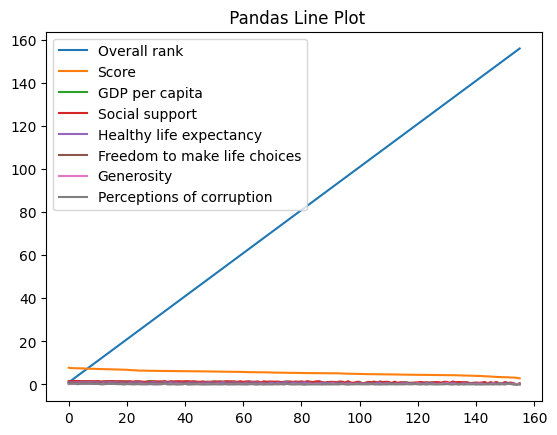

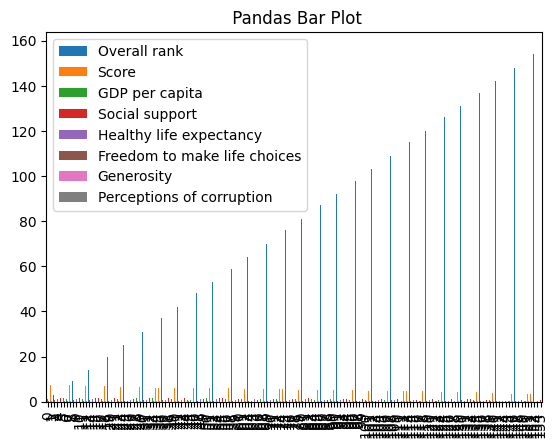

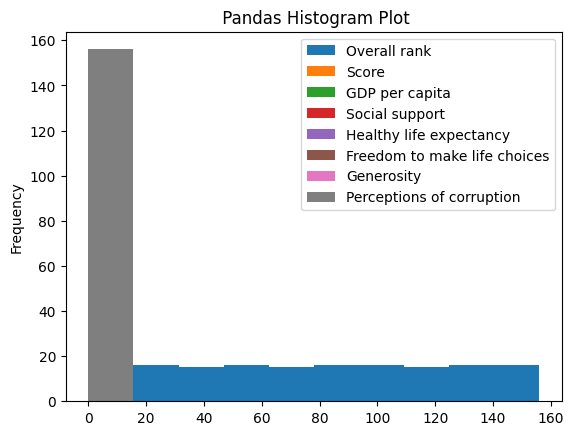

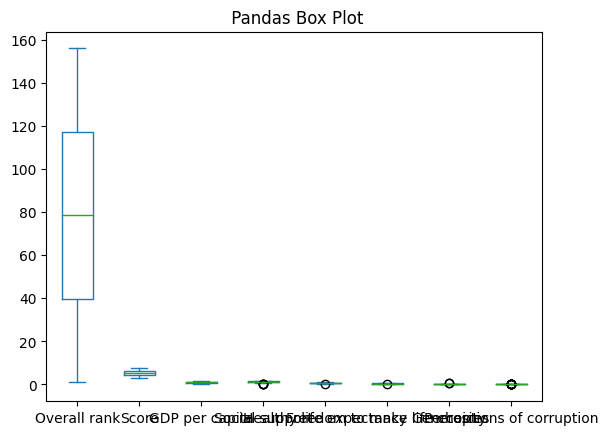

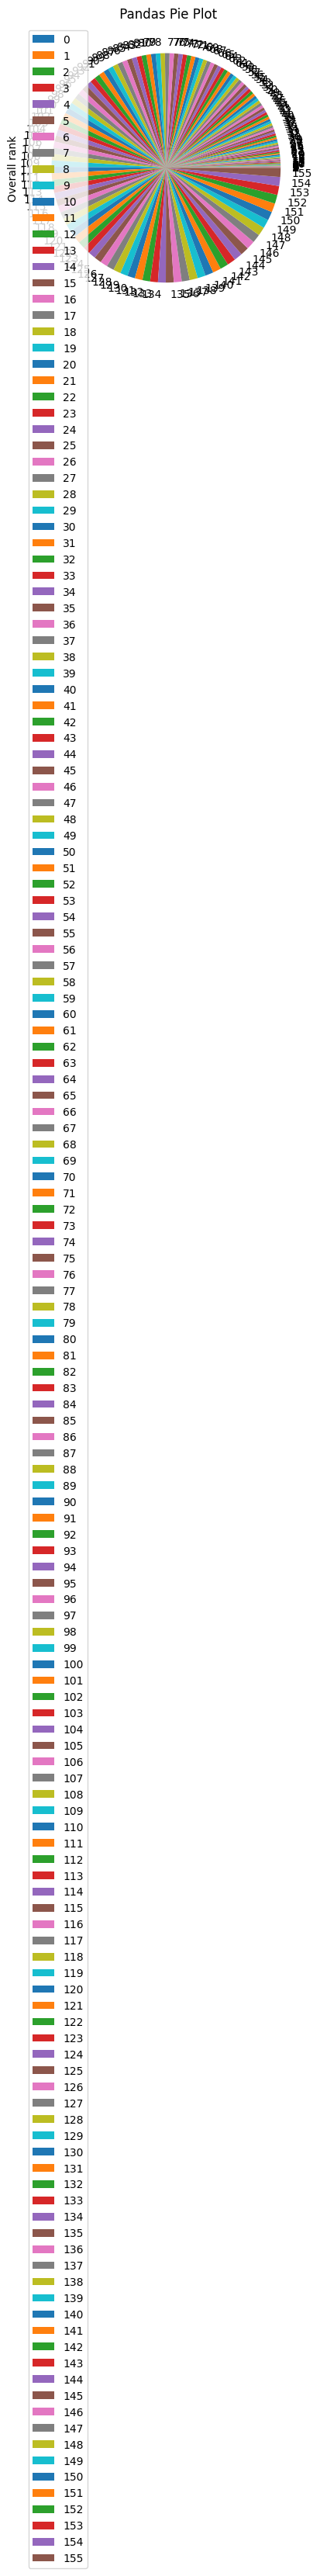

 The dynamic plots using matplotlib are as follows: 



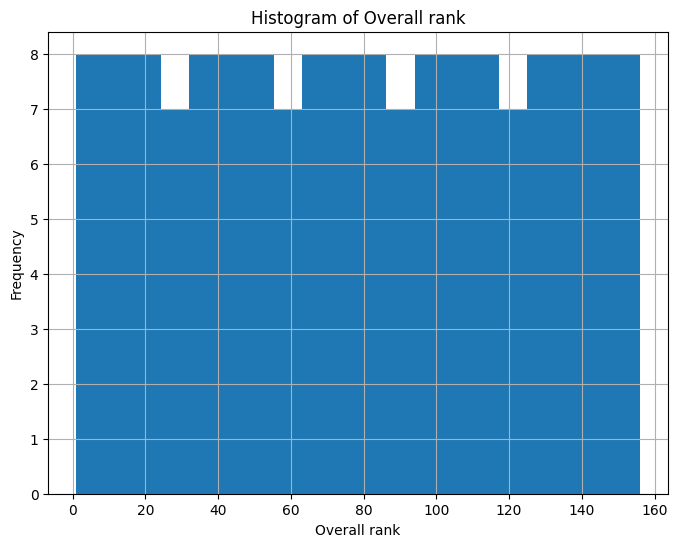

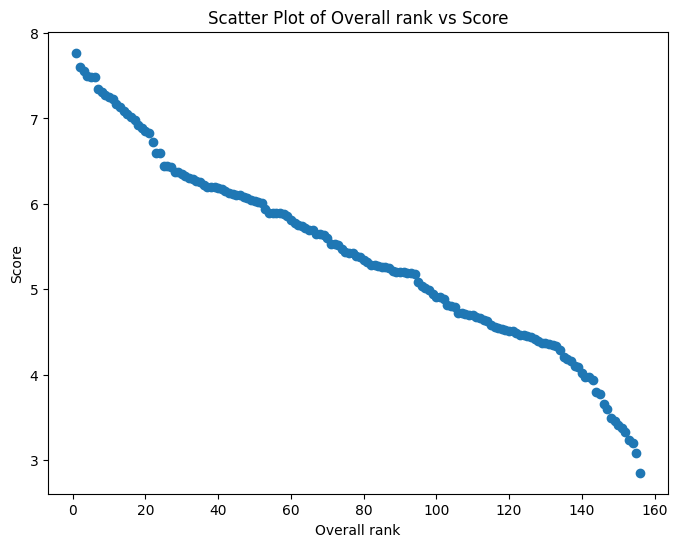

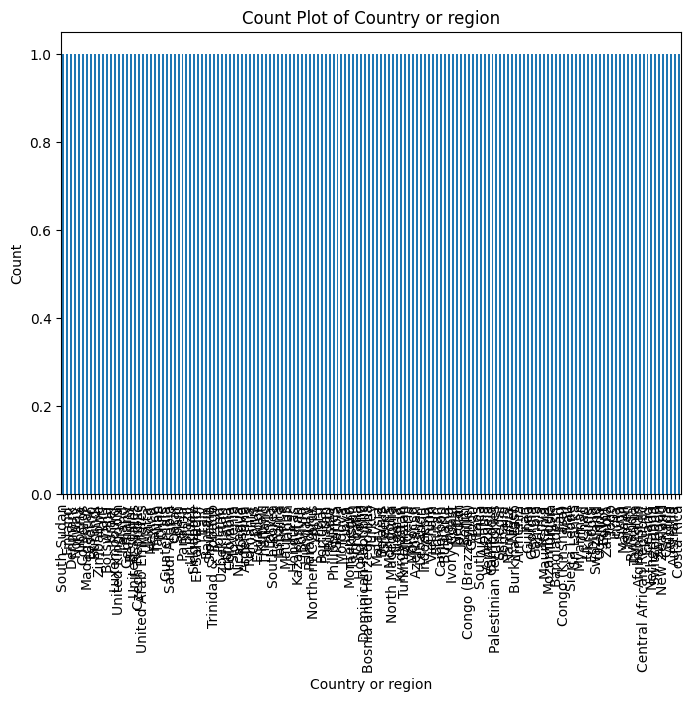

Enter your question: which is the good country to live in as per happiness ratings?


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Data summary: Mean: Overall rank                    78.500000
Score                            5.407096
GDP per capita                   0.905147
Social support                   1.208814
Healthy life expectancy          0.725244
Freedom to make life choices     0.392571
Generosity                       0.184846
Perceptions of corruption        0.110603
dtype: float64, Median: Overall rank                    78.5000
Score                            5.3795
GDP per capita                   0.9600
Social support                   1.2715
Healthy life expectancy          0.7890
Freedom to make life choices     0.4170
Generosity                       0.1775
Perceptions of corruption        0.0855
dtype: float64, Mode: Social support, Correlation:                               Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Data summary: Mean: Overall rank                    78.500000
Score                            5.407096
GDP per capita                   0.905147
Social support                   1.208814
Healthy life expectancy          0.725244
Freedom to make life choices     0.392571
Generosity                       0.184846
Perceptions of corruption        0.110603
dtype: float64, Median: Overall rank                    78.5000
Score                            5.3795
GDP per capita                   0.9600
Social support                   1.2715
Healthy life expectancy          0.7890
Freedom to make life choices     0.4170
Generosity                       0.1775
Perceptions of corruption        0.0855
dtype: float64, Mode: Social support, Correlation:                               Overall rank     Score  GDP per capita  \
Overall rank                      1.000000 -0.989096       -0.801947   
Score                            -0.989096  1.000000        0.793883   
GDP per capita                   

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab import files

import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

def load_data_from_csv(uploaded_file):
  """Loads data from an uploaded CSV file."""
  data = pd.read_csv(io.StringIO(uploaded_file.decode('utf-8')))
  return data
# check columns
def columns_missing(data):
  for i in data.columns:
    if data[i].isna().sum() > len(data[i])//2:
      data.drop(i,axis = 1,inplace = True)
  return data
# function to deal with missing values

def missing_values(data):
  columns_missing(data)
  if (data.isna().sum() > 0).any() and (data.isna().sum() < len(data)//2).any(): # Use .any() to check if any value meets the condition
    data = data.fillna(data.mean())
  if (data.isna().sum() > 0).any() and (data.isna().sum() > len(data)//2).any():
    data.interpolate(method = 'linear',limit_direction = 'forward')
  return data

def calculate_stats(data):
  """Calculates basic statistical measures."""
  # ... (same as previous response)
  # returing mean,median,mode and corr
  # for better understandong and easier access using pandas
  data = columns_missing(data)
  data = missing_values(data)
  mean = data.mean(numeric_only = True
                   )
  median = data.median(numeric_only = True)
  mode = max(data.mode(numeric_only= True))
  corr = data.corr(numeric_only = True)
  print("The mean of the data is: "+str(mean))
  print("The median of the data is: "+str(median))
  print("The mode of the data is: "+str(mode))
  print("The correlation of the data is: "+str(corr))
  return mean,median,mode,corr,data.head()

def format_data(data):  # formatting data into text to feed to LLM
  data_str = data.to_string()
  return data_str


def create_plots(data):
  """Creates various plots using matplotlib."""
  # ... (same as previous response)
   # Check for numerical columns
  numeric_cols = data.select_dtypes(include=np.number).columns

  if len(numeric_cols) > 0:
    # Histogram for first numerical column
    plt.figure(figsize=(8, 6))
    data[numeric_cols[0]].hist(bins=20)
    plt.title(f"Histogram of {numeric_cols[0]}")
    plt.xlabel(numeric_cols[0])
    plt.ylabel("Frequency")
    plt.show()

    # Scatter plot for first two numerical columns (if available)
    if len(numeric_cols) > 1:
      plt.figure(figsize=(8, 6))
      plt.scatter(data[numeric_cols[0]], data[numeric_cols[1]])
      plt.xlabel(numeric_cols[0])
      plt.ylabel(numeric_cols[1])
      plt.title(f"Scatter Plot of {numeric_cols[0]} vs {numeric_cols[1]}")
      plt.show()

  # Check for categorical columns
  categorical_cols = data.select_dtypes(include='object').columns
  if len(categorical_cols) > 0:
    # Bar plot for first categorical column
    plt.figure(figsize=(8, 6))
    data[categorical_cols[0]].value_counts().plot(kind='bar')
    plt.title(f"Count Plot of {categorical_cols[0]}")
    plt.xlabel(categorical_cols[0])
    plt.ylabel("Count")
    plt.show()

# pandas plots
def pandas_plots(data):
  data.plot()
  plt.title(" Pandas Line Plot")
  plt.show()
  data.plot.bar()
  plt.title(" Pandas Bar Plot")
  plt.show()
  data.plot.hist()
  plt.title(" Pandas Histogram Plot")
  plt.show()
  data.plot.box()
  plt.title(" Pandas Box Plot")
  plt.show()
  # Select only numerical columns for correlation and setting index
  numerical_data = data.select_dtypes(include=np.number)
  if not numerical_data.empty:  # Proceed only if there are numerical columns
   # Instead of setting index, select a column for the pie chart
    pie_column = numerical_data.columns[0] # Select the first numerical column
    numerical_data.plot(kind='pie', y=pie_column) # Specify the 'y' column
    plt.title(" Pandas Pie Plot")
    plt.show()
  else:
    print("No numerical columns found for pie and scatter plots.")

def generate_llm_response(data, stats, query):
  """Generates an LLM response based on data and stats."""
  # ... (same as previous response)
  model_name = "tiiuae/falcon-7b-instruct"
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForCausalLM.from_pretrained(model_name,
 load_in_4bit=True, device_map="auto")

  # Incorporate stats into the prompt
  mean, median, mode, corr,data_h = stats
  prompt = f"Data summary: Mean: {mean}, Median: {median}, Mode: {mode}, Correlation: {corr}.\nData: {data_h}\nQuestion: {query}"

  # Generate text
  input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to("cuda")
  # Increase max_length or use max_new_tokens
  output = model.generate(input_ids, max_new_tokens=200, do_sample=True)  # Use max_new_tokens instead of max_length
  generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
  return generated_text

def main():
  uploaded = files.upload()
  for fn in uploaded.keys():
    data = load_data_from_csv(uploaded[fn])
  print(" The sample data is as follows  ",data.head())
  # Perform analysis and generate plots
  print(" The statistical analysis is as follows: \n" )
  stats = calculate_stats(data)
  print(" The dynamic plots using pandas are as follows: \n")
  pandas_plots(data)
  print(" The dynamic plots using matplotlib are as follows: \n")
  create_plots(data)
  data = format_data(data)
  while True:
    # Example user interaction

    query = input("Enter your question: ")

    response = generate_llm_response(data, stats, query)
    print(response)
    rex = input("If you want to continue pls press yes, else no")
    if rex == "yes" or rex == "Yes" or rex == "YES":
        continue
    else:
        break

if __name__ == "__main__":
  main()


In [10]:
data

NameError: name 'data' is not defined